<a href="https://colab.research.google.com/github/dariaAlium/iad/blob/master/Lab_2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №2. Кластерный анализ. </center>

## Задание 1

В данном задании вам необходимо реализовать алгоритм кластеризации [Partition Around Medoids](http://algowiki-project.org/ru/%D0%A3%D1%87%D0%B0%D1%81%D1%82%D0%BD%D0%B8%D0%BA:Denemmy/Partitioning_Around_Medoids_%28%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%29).  
  
Два возможных варианта реализации:  
  
### Функция
  
Нужно написать функцию, которая принимает на вход несколько параметров и возвращает также несколько значений.  
  
Параметры функции:
- **data:** данные в виде dataframe или матрицы (аналогично функциям и методам, которые рассматривали на практике);
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.

Возвращаемые значения:  
- **inertia:** итоговое значение целевой функции;
- **medoids:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels:** метки кластеров для каждого объекта.
  
### Класс  
  
По аналогии с классами в scikit-learn, нужно реализовать класс, наследуемый от [Base Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).  
Подробнее про реализацию своих моделей в scikit-learn: [here](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator).
  
Параметры: 
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.  
  
Методы:  
- **fit():** метод для выполнения кластеризации.  
    Аргументы метода:  
    - **data:** данные в виде dataframe или матрицы
  
Атрибуты:  
- **inertia_:** итоговое значение целевой функции;
- **medoids_:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels_:** метки кластеров для каждого объекта.  
   
<br>  
**Note 1:** Параметры `max_iter` и `tol` должны иметь дефолтные значения.  
**Note 2:** Функции для вычисления расстояний самим реализовывать не нужно, используйте `pdist()`.  
  
<br>  
Также необходимо написать документацию к функции/методу: описать формат входных данных (параметров) и возвращаемых значений, особенности работы функции и детали реализации алгоритма. В качестве образца можно взять документацию к функциям/методам, которые рассматривали на занятиях.  
  
Наивная реализация алгоритма будет работать довольно медленно - это нормально. Будет плюсом (но не является обязательным), если вы попытаетесь оптимизировать ваш код. Можете указать все ваши решения для оптимизации в документации.   

# Задание 2

В рамках данной лабораторной работы вам предлагается проанализировать набор данных по различным городам США. Каждый город характеризуется следующими признаками:

In [0]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, is_valid_linkage, dendrogram
from sklearn.cluster import KMeans

In [0]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

In [261]:
data_desc = pd.read_csv('Data_Description.txt', sep=':')
data_desc

,Attribute,Description
0,Place,"City, state (postal code)"
1,Climate & Terrain,"Very hot and very cold months, seasonal temperature variation, heating- and cooling-degree days, freezing days, zero-degree days, ninety-degree days."
2,Housing,"Utility bills, property taxes, mortgage payments."
3,Health Care & Environment,"Per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, flouridation of drinking water, air pollution."
4,Crime,"Violent crime rate, property crime rate."
5,Transportation,"Daily commute, public transportation, Interstate highways, air service, passenger rail service."
6,Education,"Pupil/teacher ratio in the public K-12 system, effort index in K-12, accademic options in higher education."
7,The Arts,"Museums, fine arts and public radio stations, public television stations, universities offering a degree or degrees in the arts, symphony orchestras, theatres, opera companies, dance companies, public libraries."
8,Recreation,"Good restaurants, public golf courses, certified lanes for tenpin bowling, movie theatres, zoos, aquariums, family theme parks, sanctioned automobile race tracks, pari-mutuel betting attractions, major- and minor- league professional sports teams, NCAA Division I football and basketball teams, miles of ocean or Great Lakes coastline, inland water, national forests, national parks, or national wildlife refuges, Consolidated Metropolitan Statistical Area access."
9,Economics,"Average household income adjusted for taxes and living costs, income growth, job growth."


### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [0]:
data = pd.read_csv('data.txt', sep=' ')

<br>  
### Задания: 

&nbsp;&nbsp;&nbsp;0. Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки `Place`, `Long` и `Lat`.

1. Выполните кластеризацию иерархическим методом.  
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.  
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы.  
<br>  
2. Выполните кластеризацию методом dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.  
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.  
<br>  
3. Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.  
<br>  
4. Выполните кластеризацию методом PAM. Используйте расстояния между объектами, определенные в пункте (1). Определите наилучшее (на ваш взгляд) число кластеров.  
Используйте реализацию алгоритма из Задания 1.  
<br>  
5. (Бонусное) Выполните кластеризацию другими методами. Например, [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) или алгоритмы, [реализованные](https://scikit-learn.org/stable/modules/clustering.html) в scikit-learn.  
<br>  
6. В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиения объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.  
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).  
<br>  
7. Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.  
<br>  
8. Оцените, как полученные кластеры распределены географически. (Бонусное) [Провизуализируйте](https://python-visualization.github.io/folium/quickstart.html) распределение на карте США.  
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?

In [16]:
#0 task
data_nec = data.copy()
data_nec.drop(['Place', 'Long', 'Lat'], axis=1, inplace=True) # axis=0 will do for rows

from sklearn import preprocessing
data_nec = pd.DataFrame(preprocessing.normalize(data_nec), columns=list(data_nec.columns))
# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data_nec)
#data_nec = pd.DataFrame(scaled_df, columns=list(data_nec.columns))
data_nec


,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,0.004673,0.055609,0.002126,0.008279,0.036155,0.024728,0.008933,0.012602,0.068462,0.994972
1,0.000871,0.012322,0.002507,0.001342,0.007393,0.003691,0.008425,0.003985,0.006586,0.999820
2,0.004148,0.065044,0.005477,0.008597,0.022432,0.022689,0.002100,0.007613,0.046530,0.996194
3,0.000569,0.009459,0.001712,0.000730,0.008233,0.004066,0.005568,0.001934,0.007014,0.999869
4,0.001569,0.019987,0.004413,0.003532,0.015617,0.007206,0.010707,0.006220,0.013638,0.999465
...,...,...,...,...,...,...,...,...,...,...
324,0.001394,0.021621,0.004478,0.001687,0.009038,0.008184,0.004426,0.002258,0.012504,0.999589
325,0.003096,0.037273,0.001835,0.006401,0.021594,0.014417,0.005765,0.012386,0.028858,0.998430
326,0.001416,0.021948,0.001869,0.001154,0.005944,0.007611,0.002680,0.002208,0.012968,0.999619
327,0.001073,0.013211,0.002064,0.001765,0.006349,0.005494,0.005263,0.002497,0.007327,0.999829


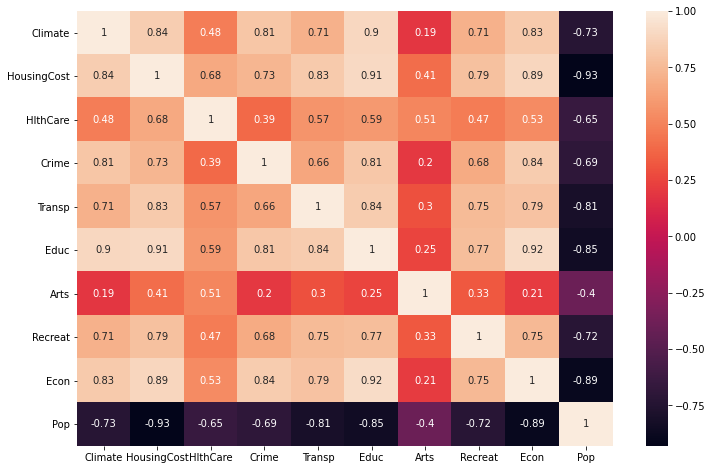

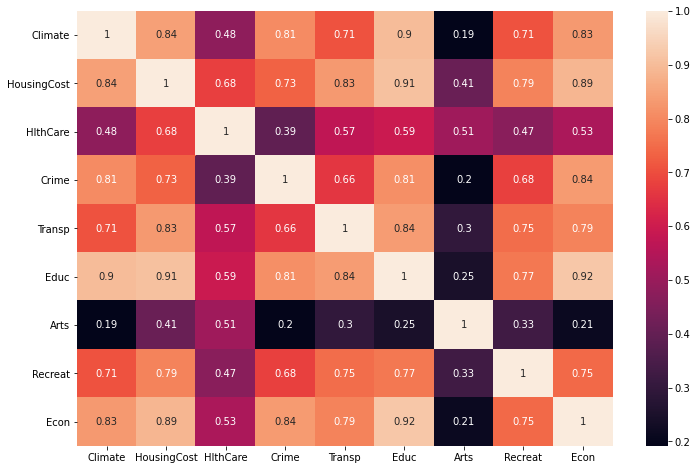

'\nтак то лучше\n'

In [17]:
#describe
#data_nec.plot(kind="bar",subplots=True,layout=(4,3),sharey=False,figsize=(15, 15))
#plt.show()
D_corr =data_nec.corr().loc[data_nec.columns,
                      data_nec.columns
                     ]
plt.figure(figsize=(12, 8))
sns.heatmap(D_corr, annot=True)
plt.show()
'''
как видно по матрице корреляции столбец с популяцией стоит тоже удалить 
так как он слишком сильно влияет на остальные (и по сравнению с другими даже
после нормализации слишком большой)
'''
data_nec.drop(['Pop'], axis=1, inplace=True) # axis=0 will do for rows
D_corr =data_nec.corr().loc[data_nec.columns,
                      data_nec.columns
                     ]
plt.figure(figsize=(12, 8))
sns.heatmap(D_corr, annot=True)
plt.show()
'''
так то лучше
'''

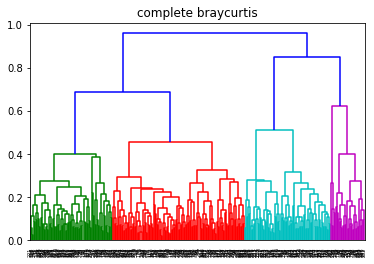

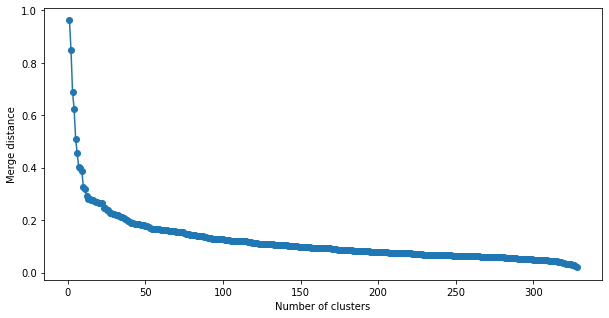

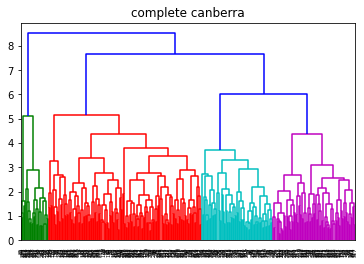

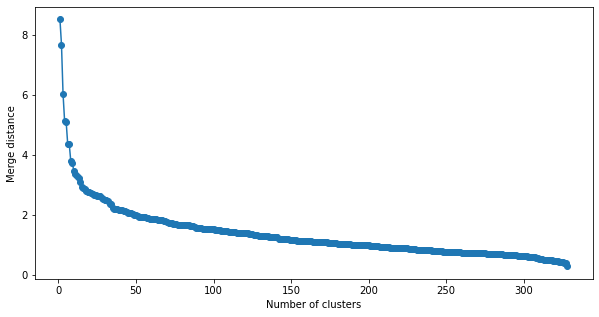

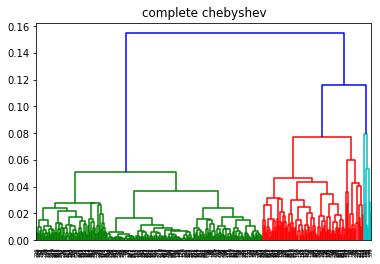

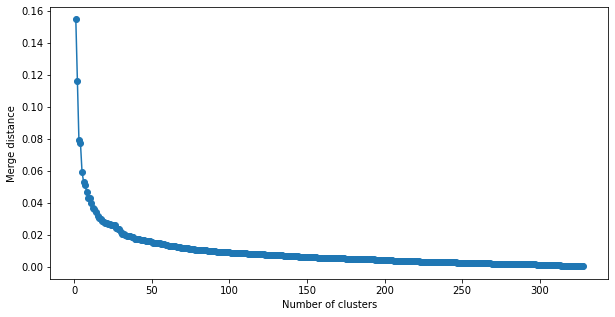

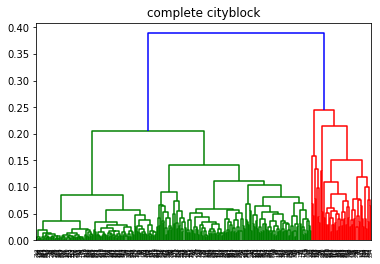

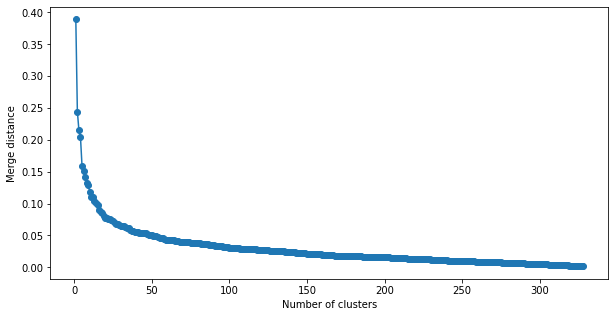

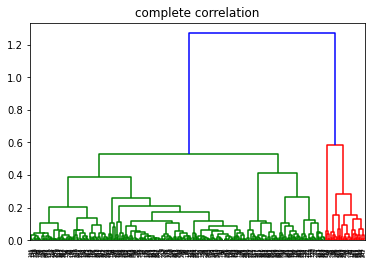

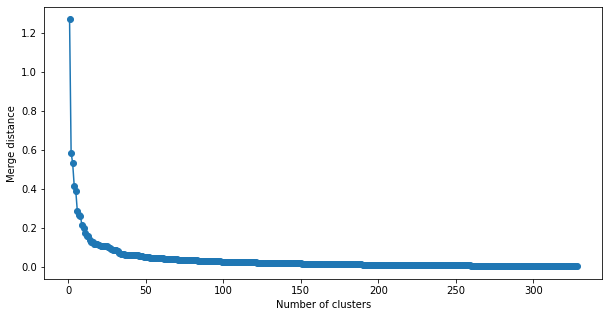

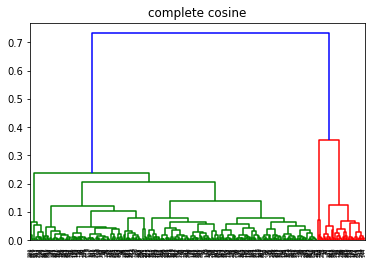

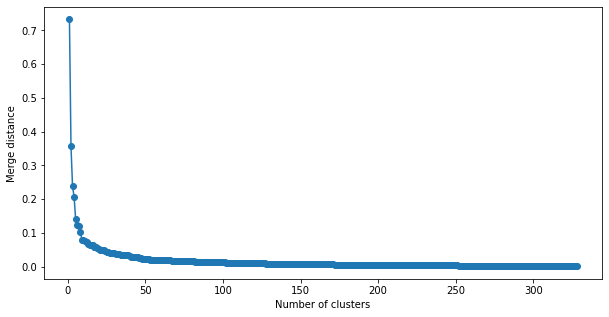

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


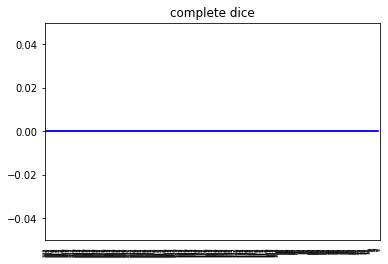

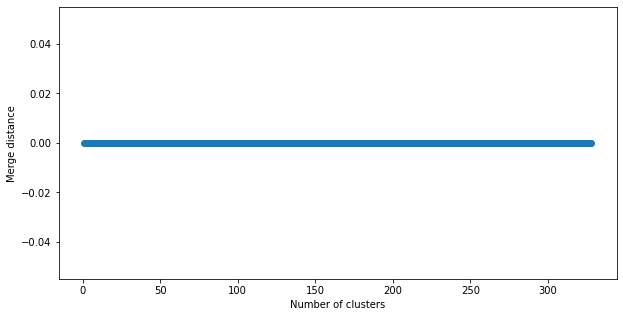

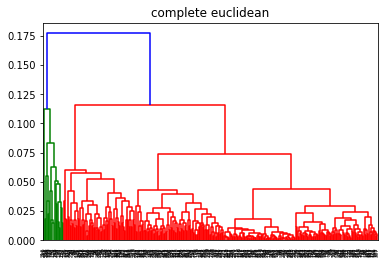

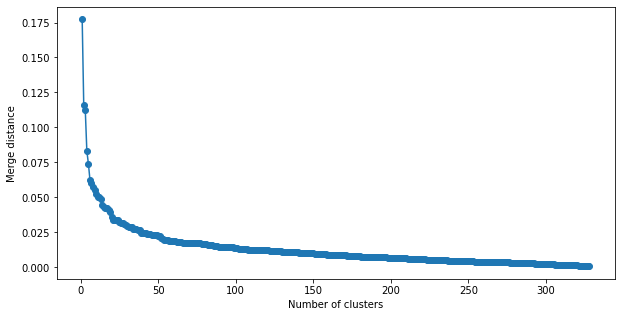

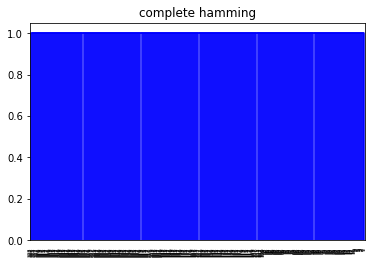

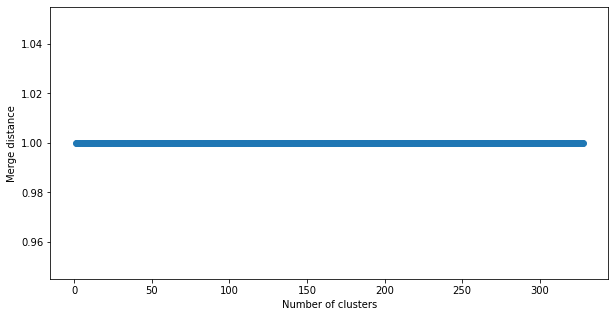

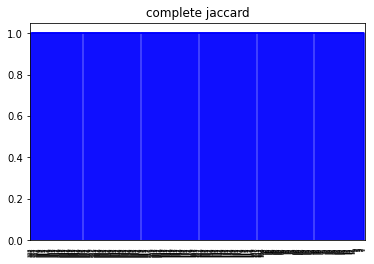

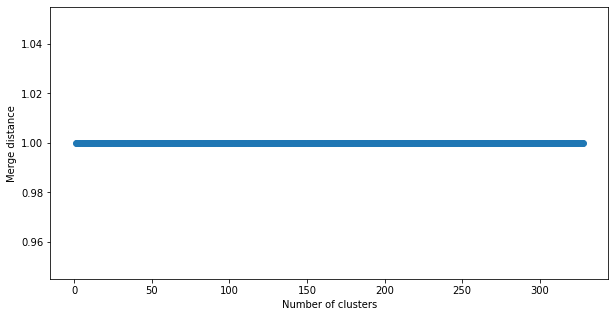

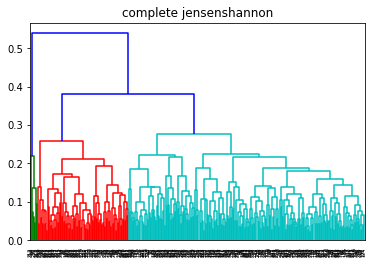

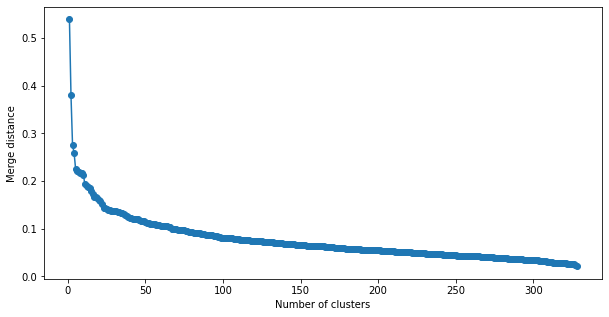

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


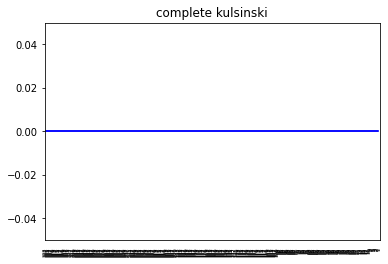

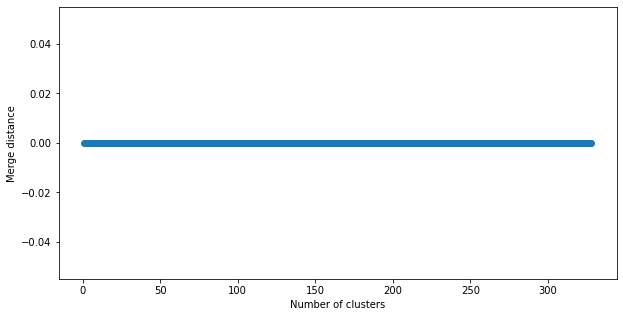

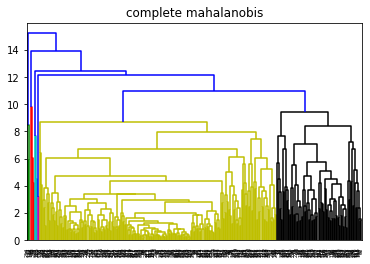

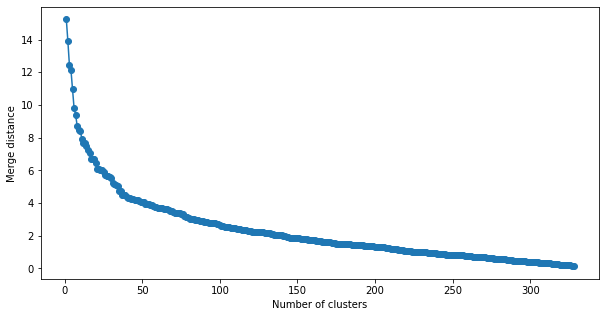

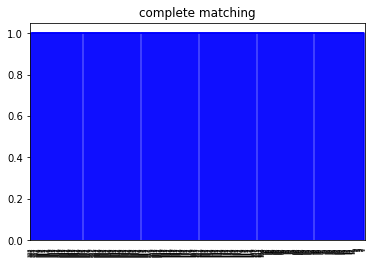

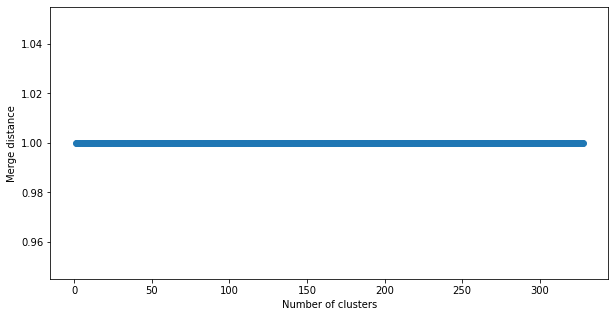

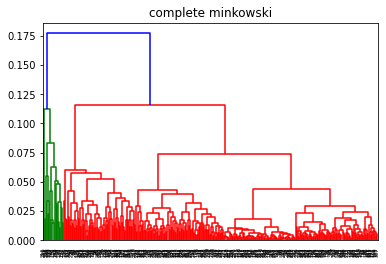

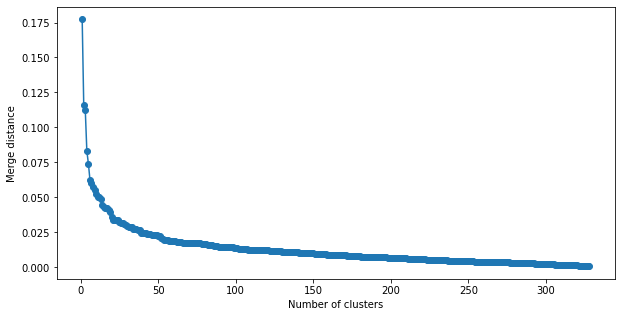

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


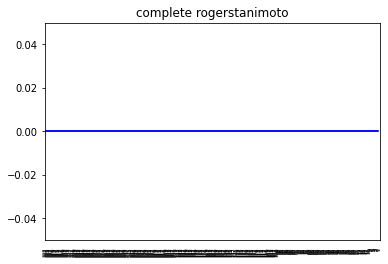

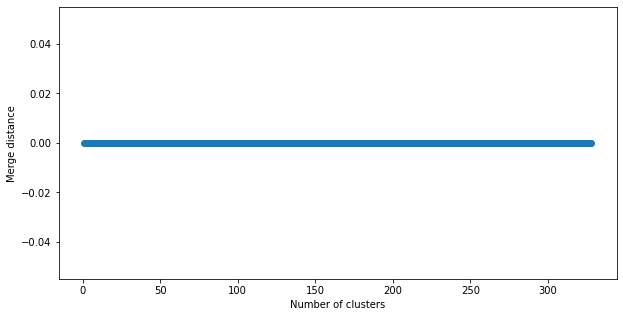

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


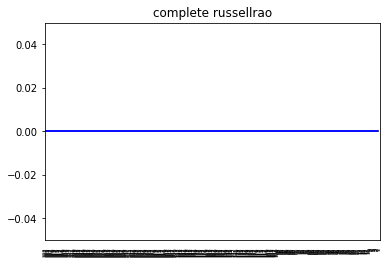

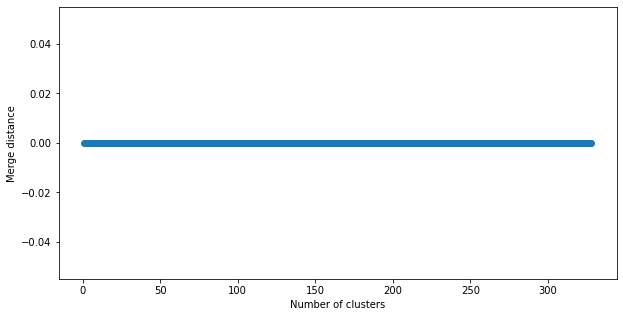

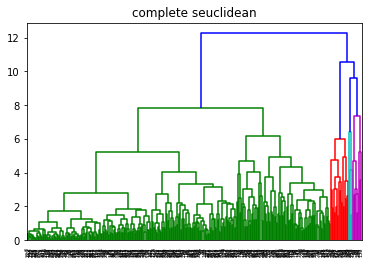

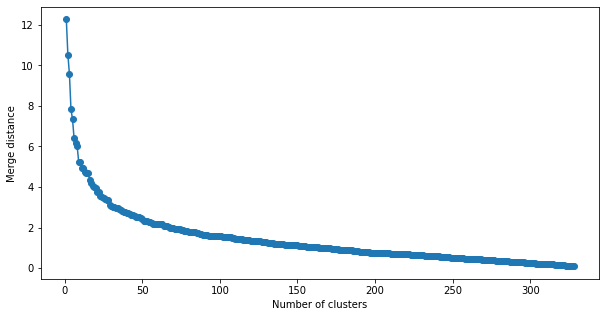

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


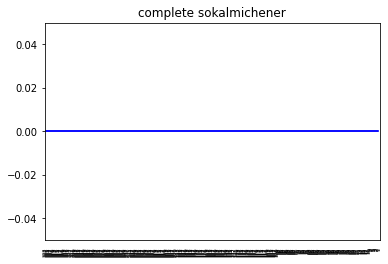

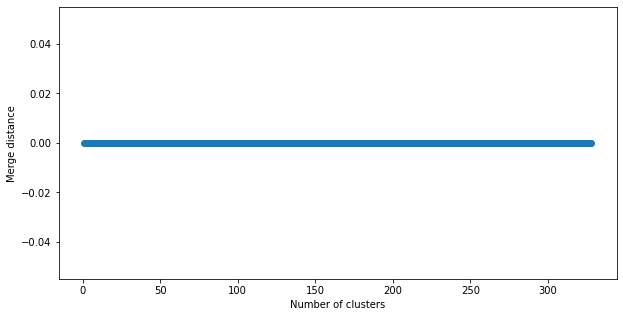

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


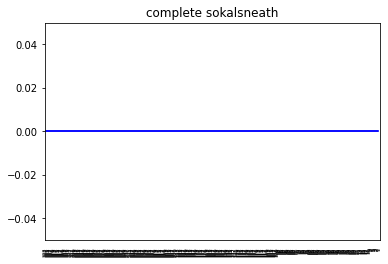

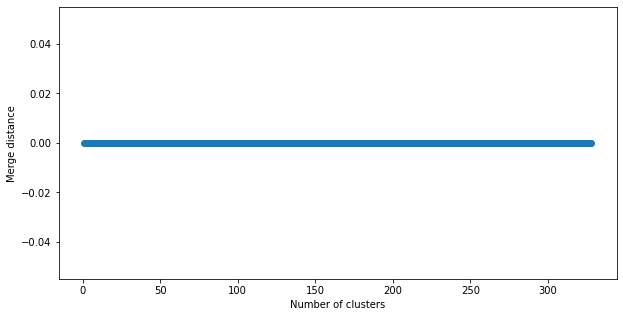

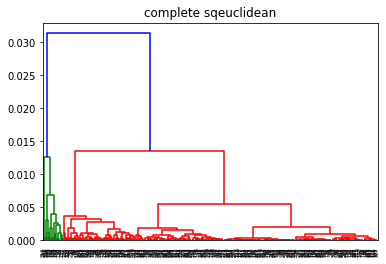

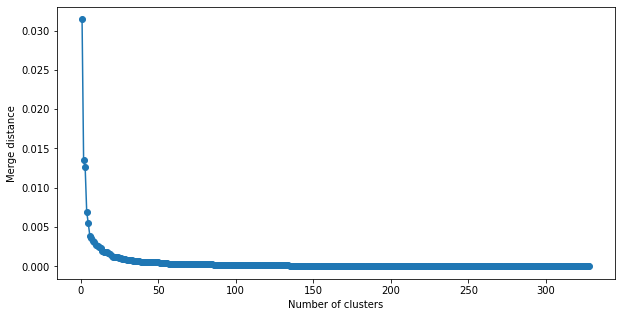

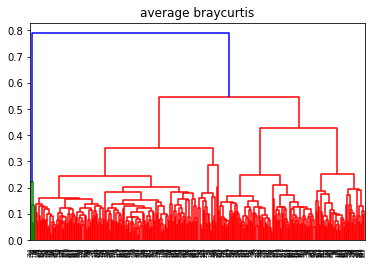

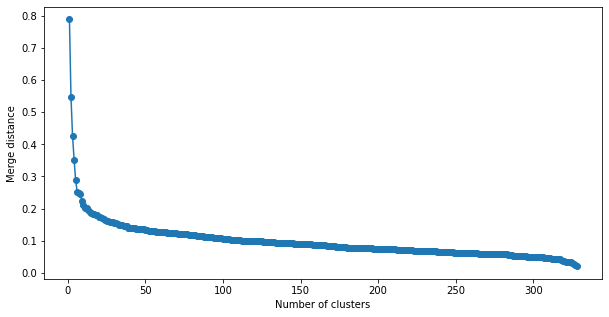

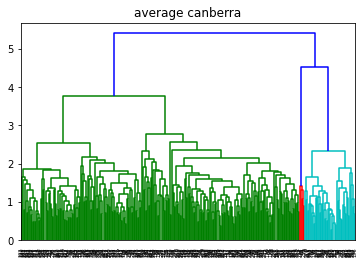

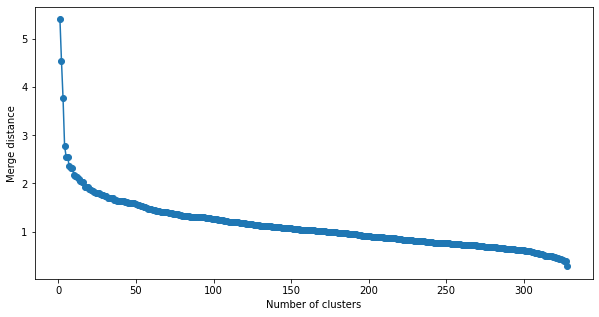

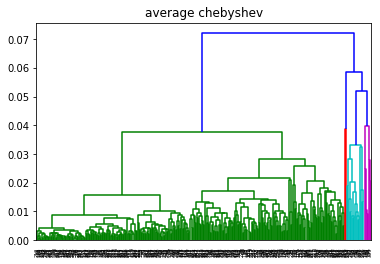

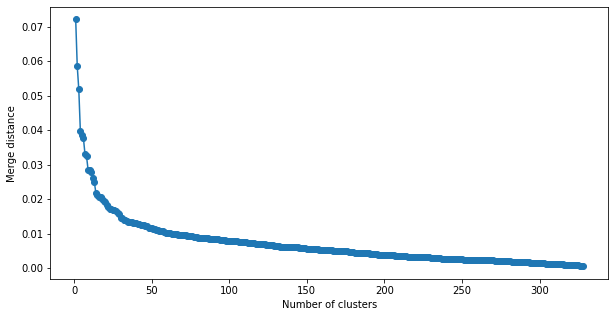

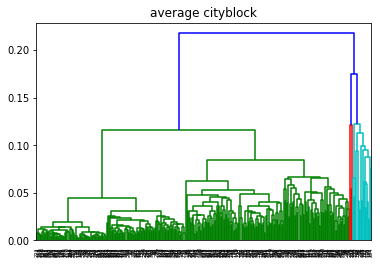

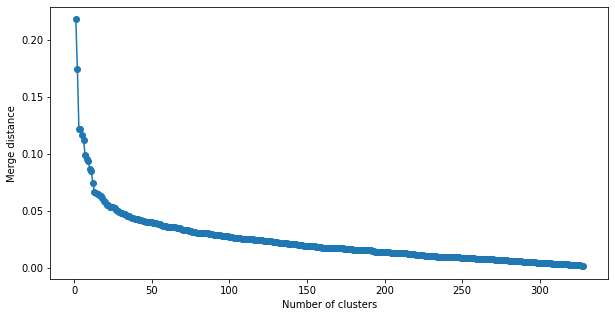

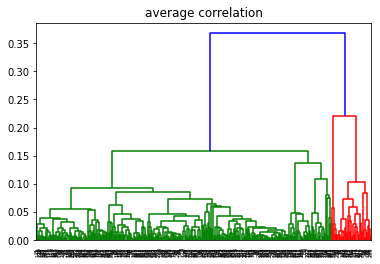

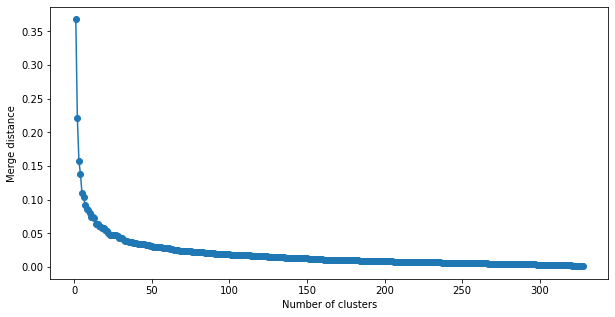

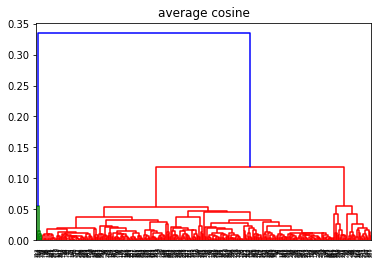

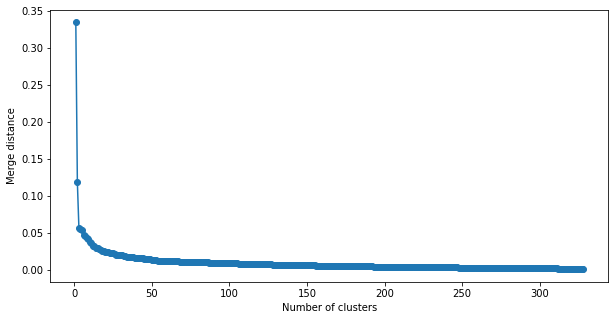

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


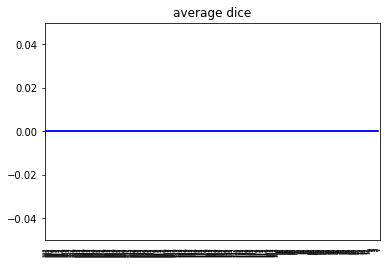

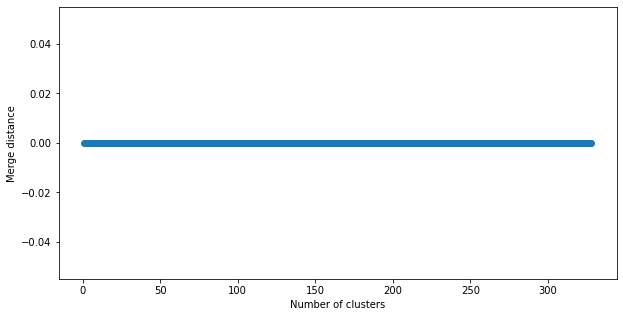

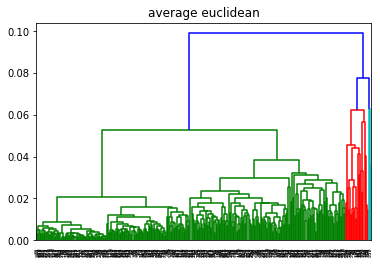

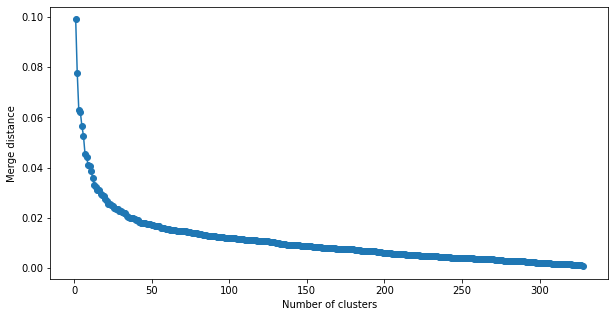

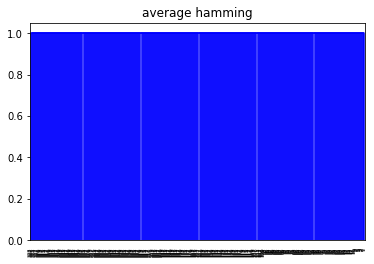

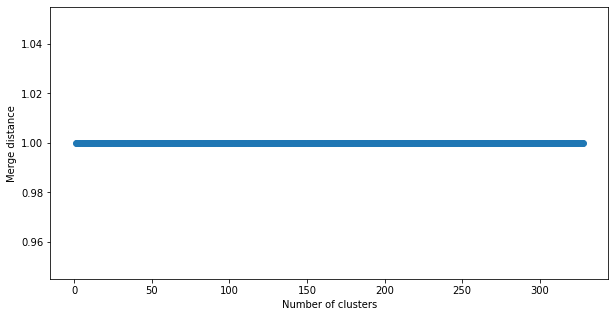

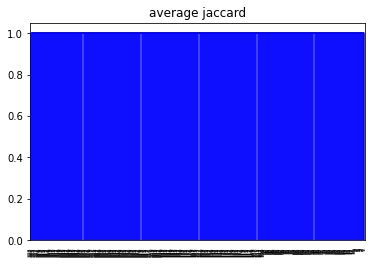

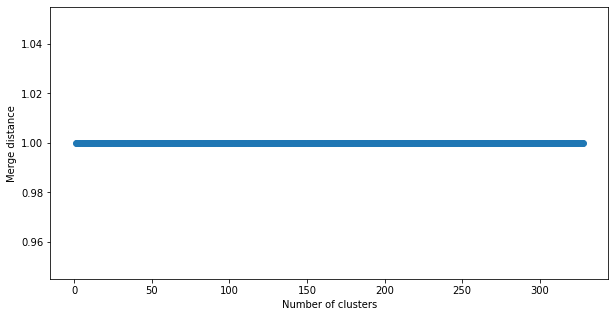

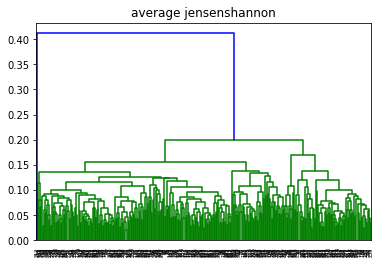

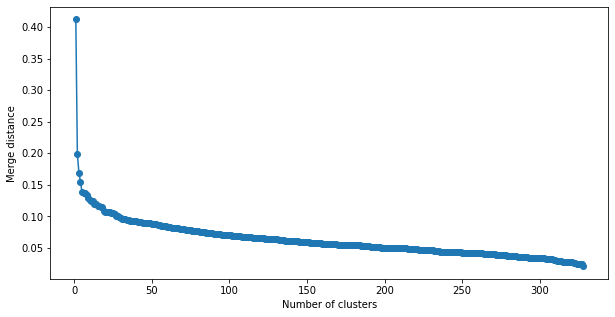

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


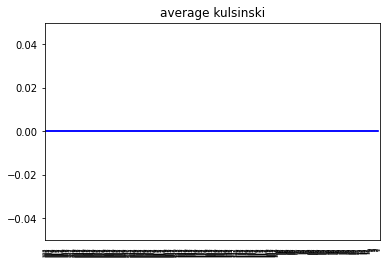

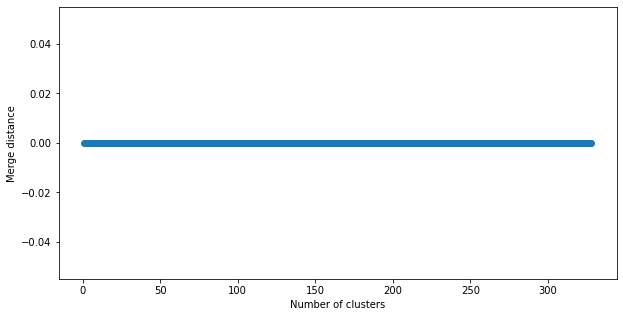

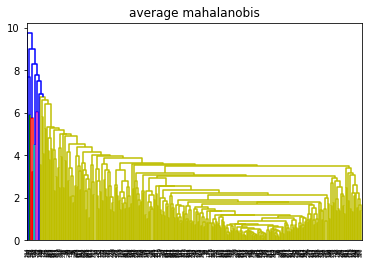

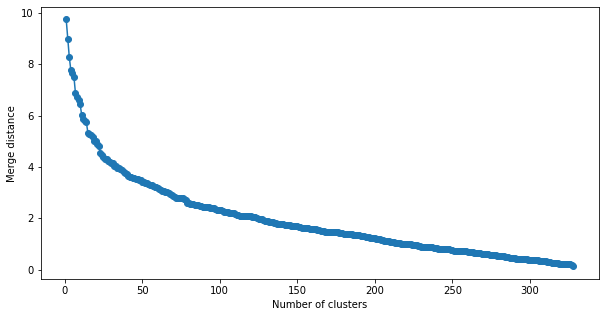

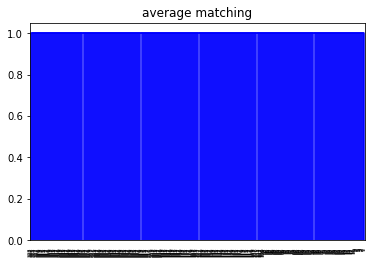

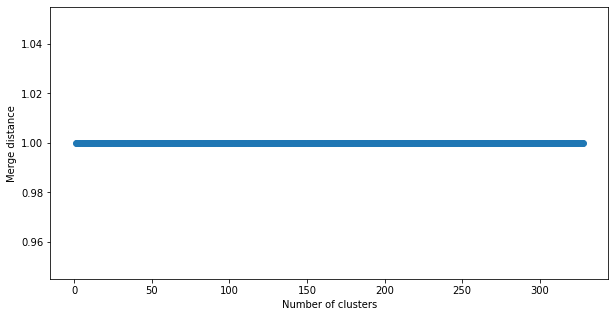

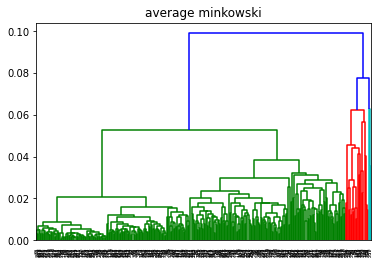

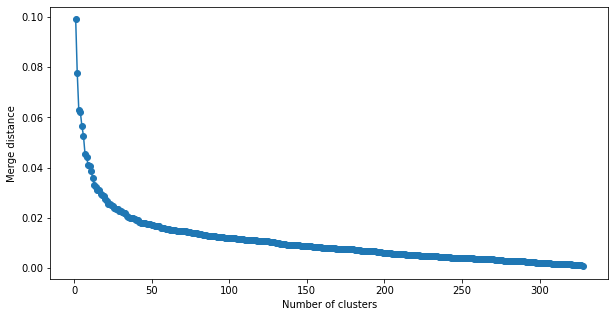

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


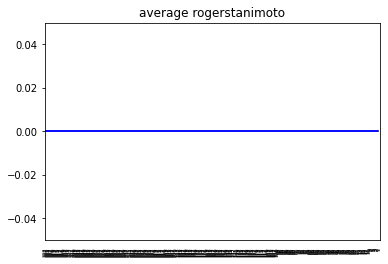

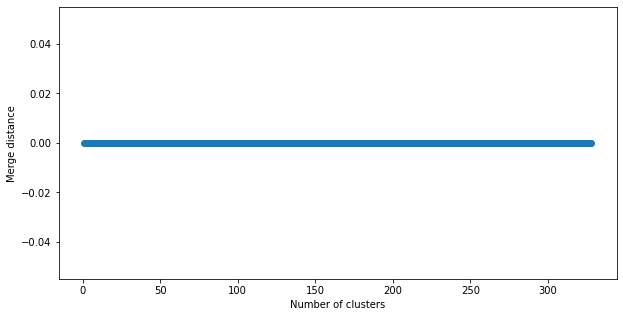

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


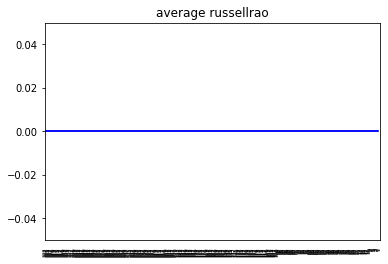

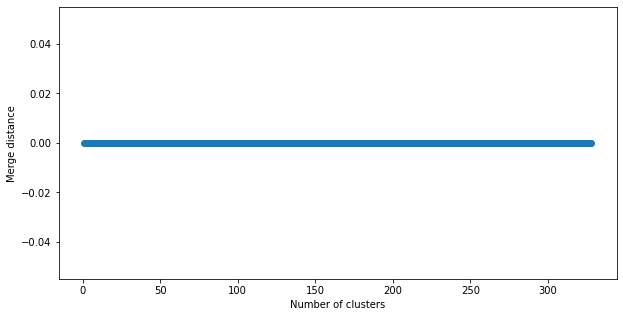

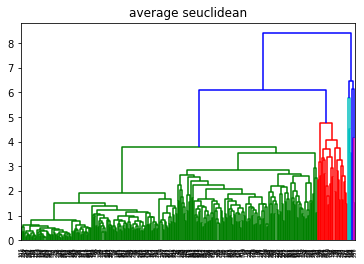

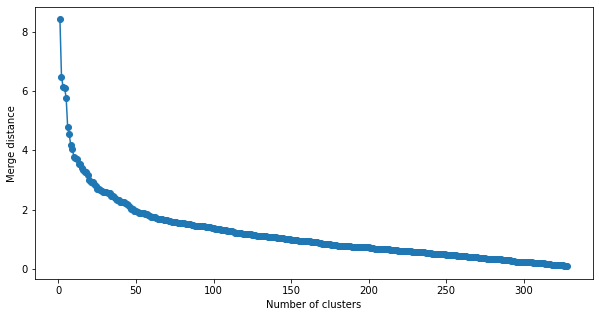

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


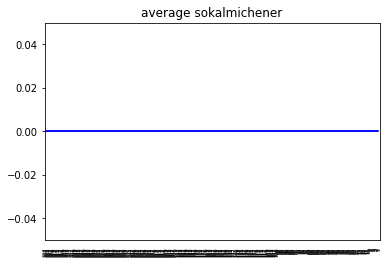

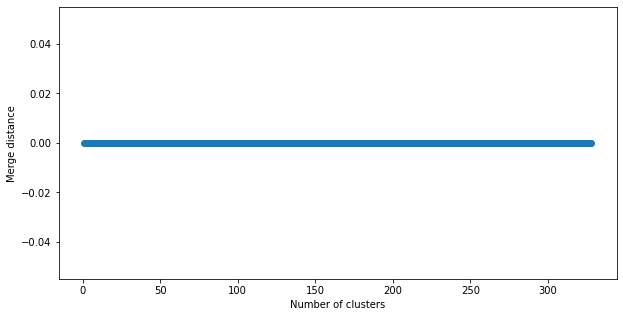

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


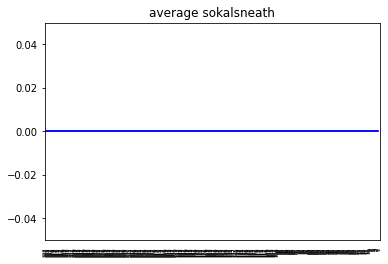

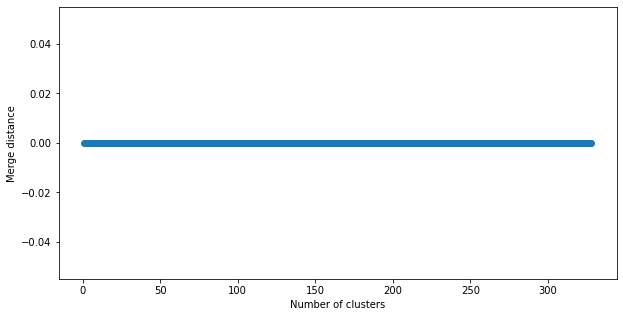

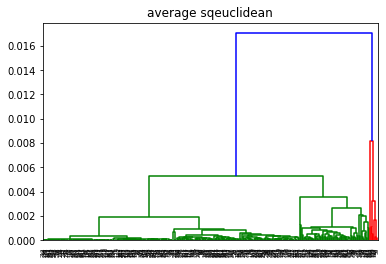

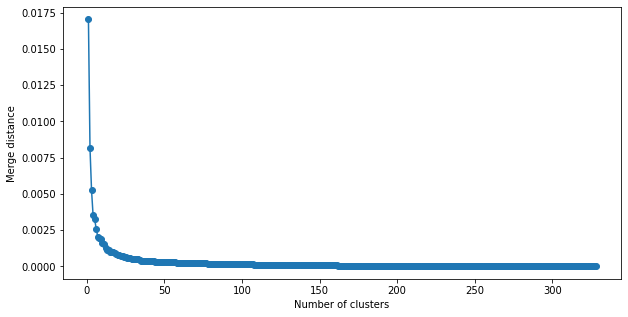

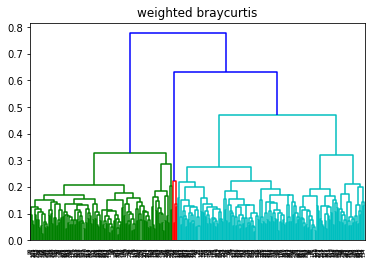

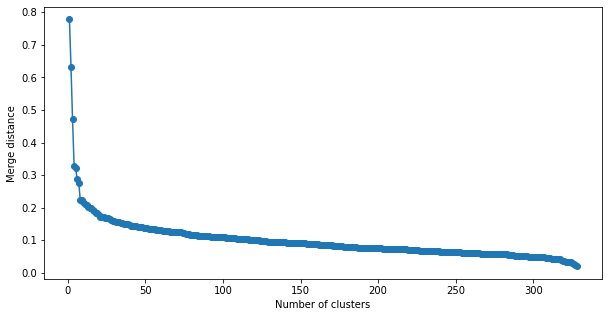

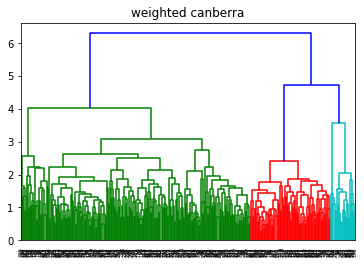

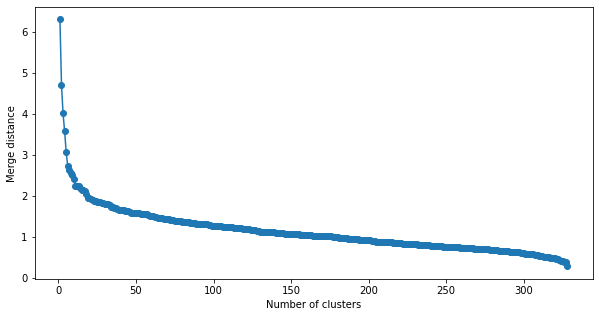

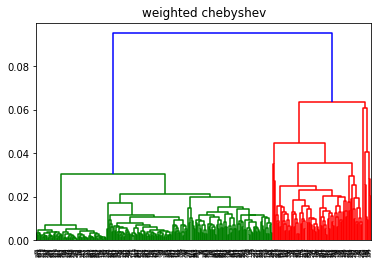

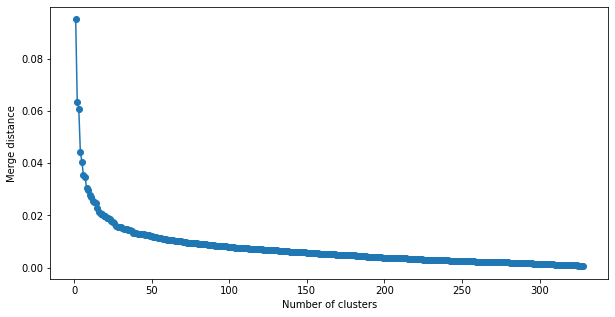

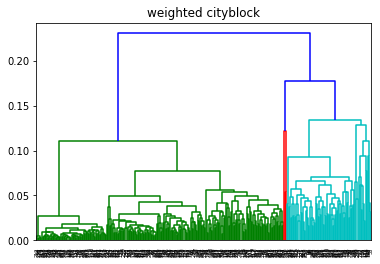

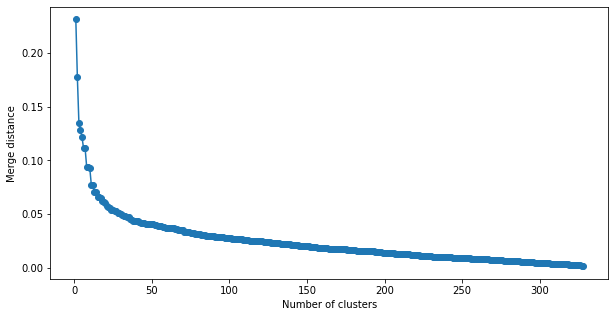

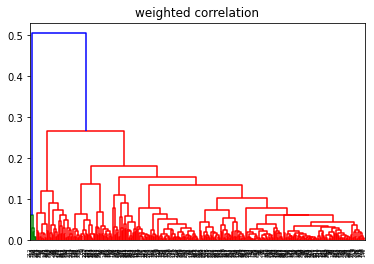

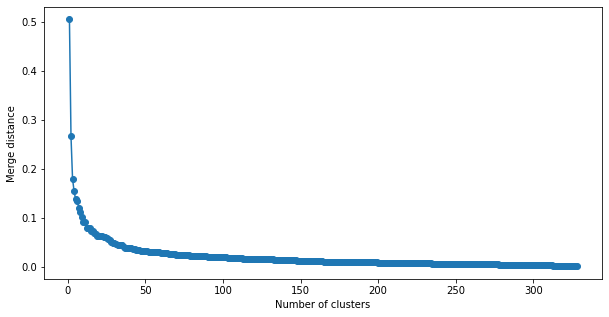

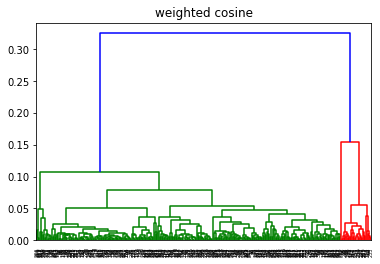

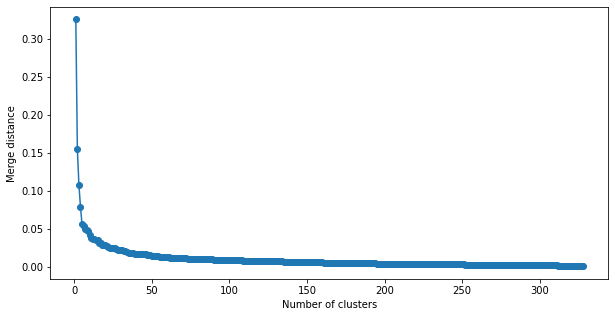

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


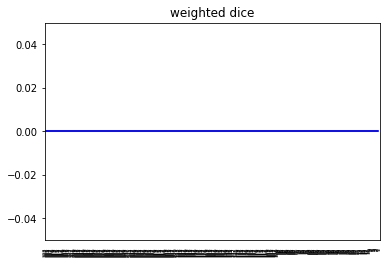

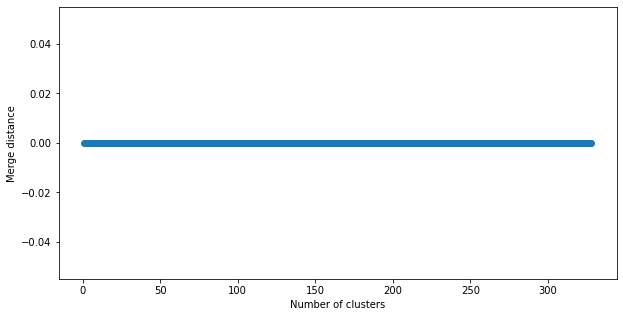

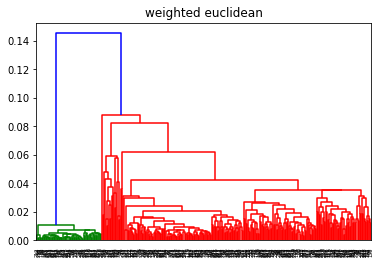

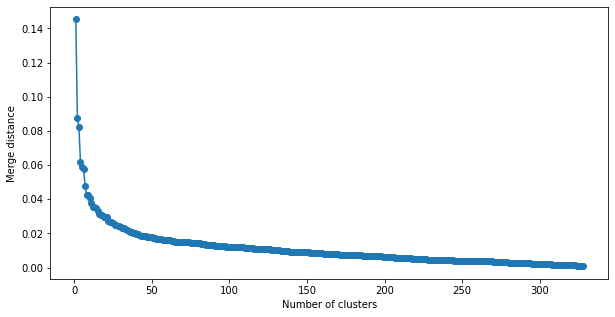

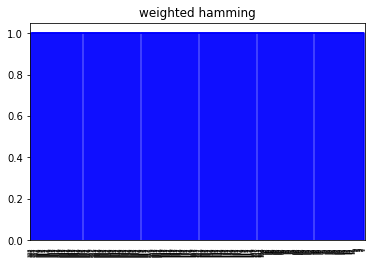

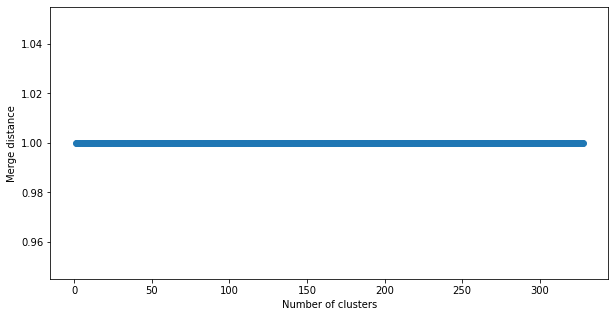

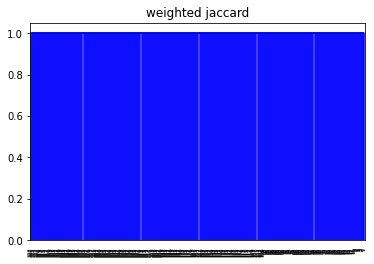

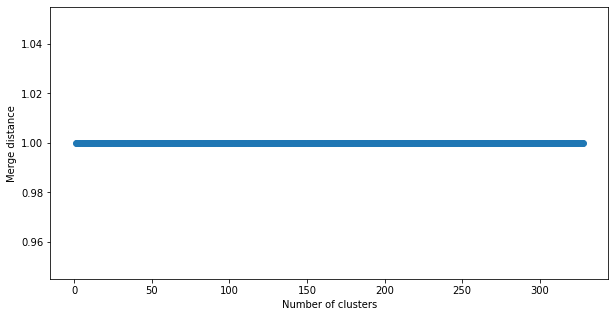

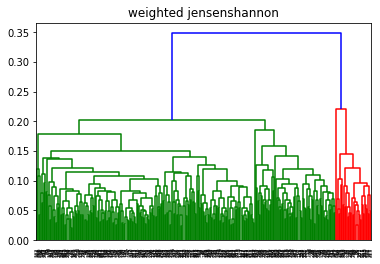

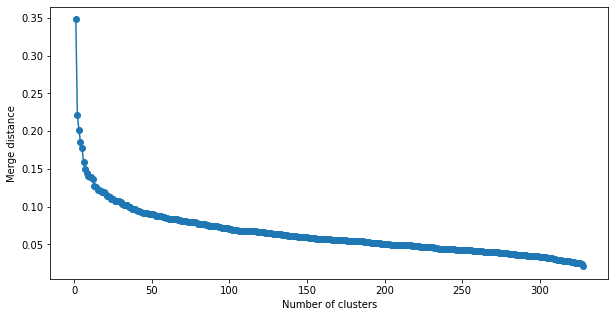

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


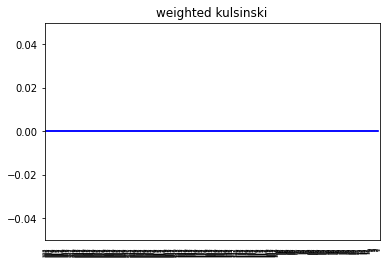

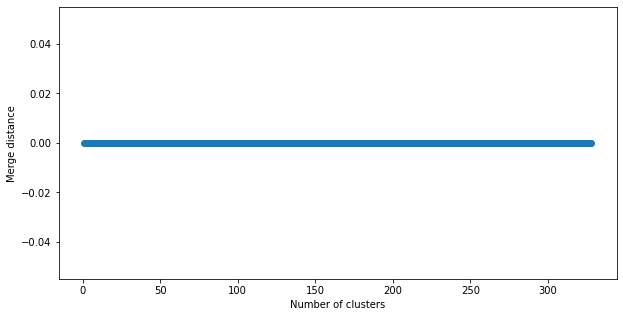

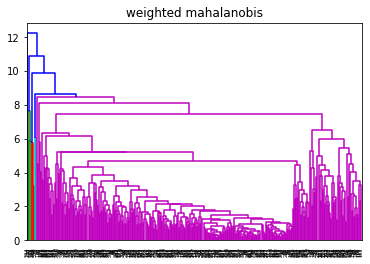

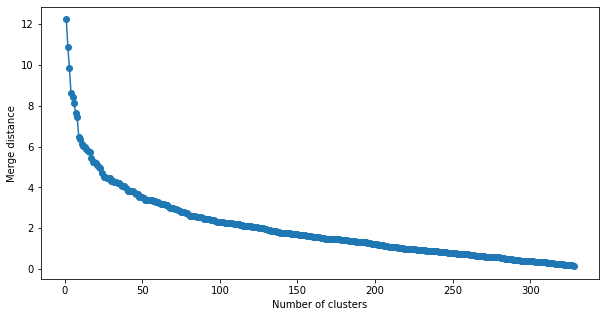

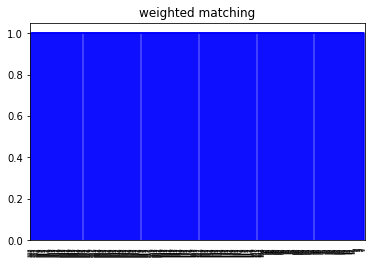

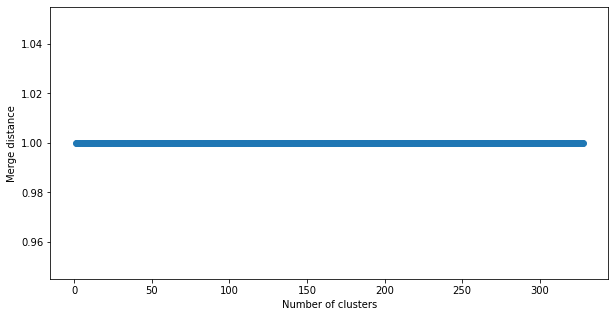

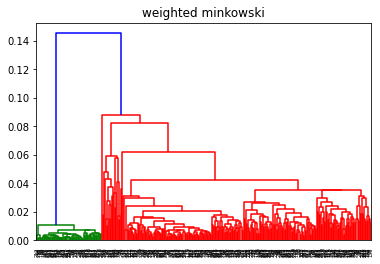

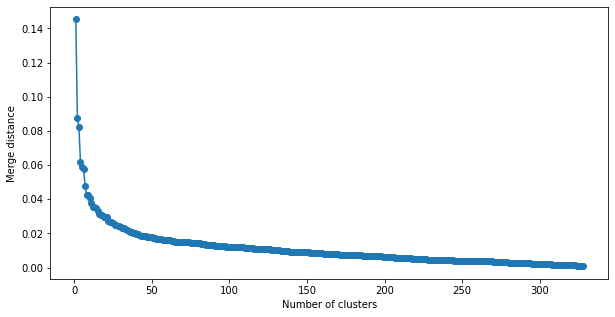

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


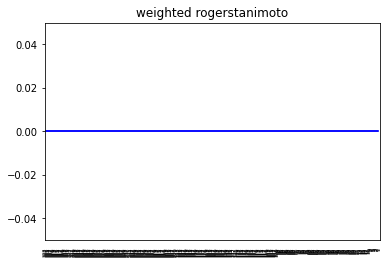

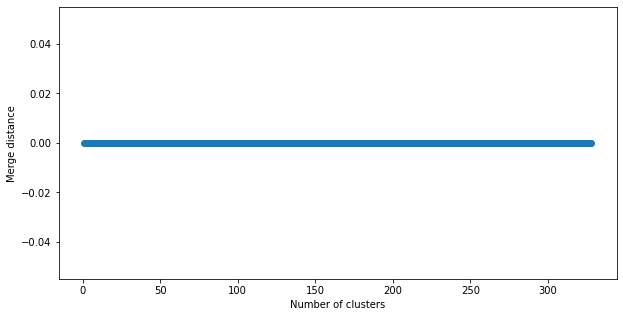

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


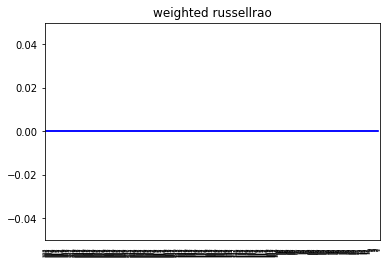

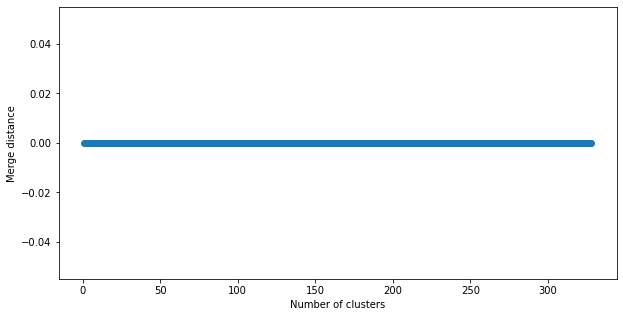

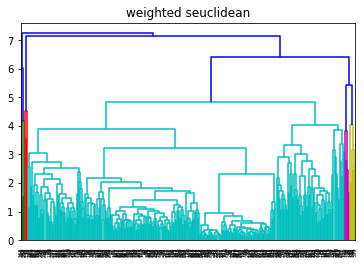

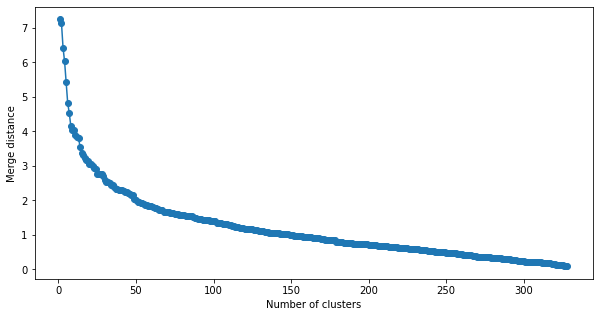

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


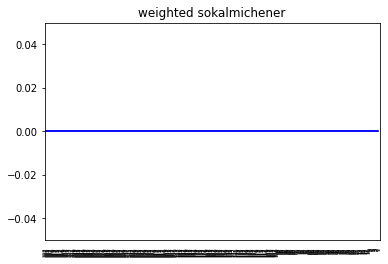

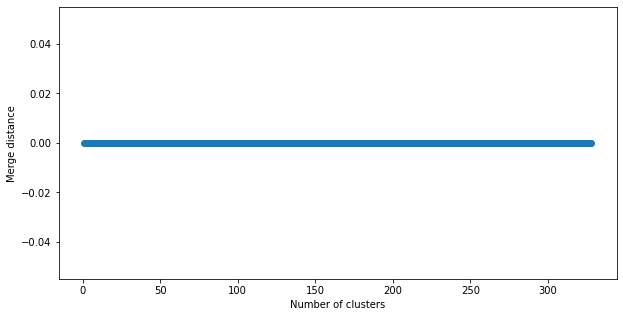

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


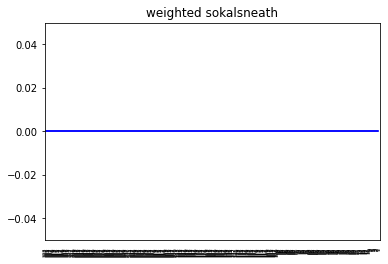

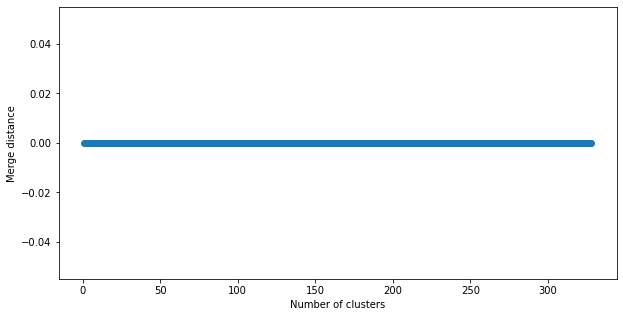

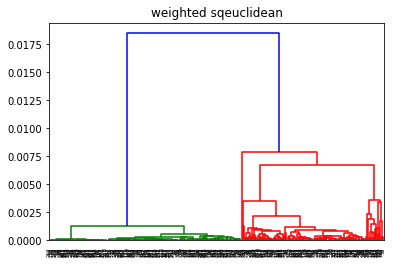

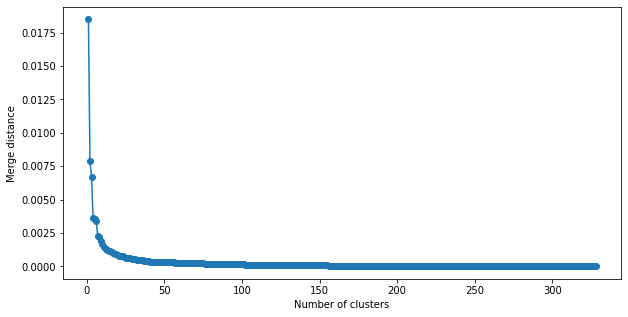

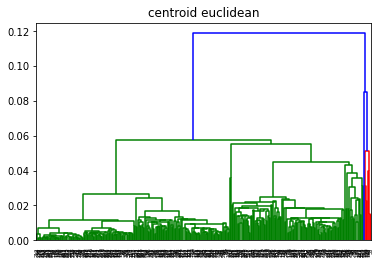

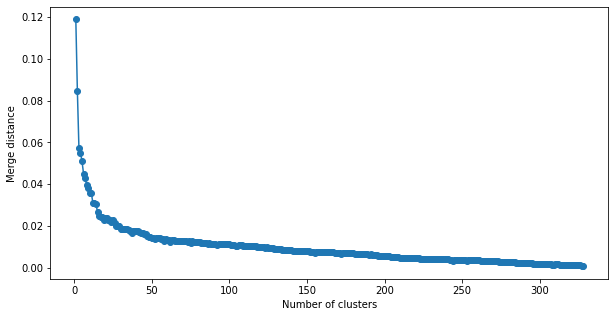

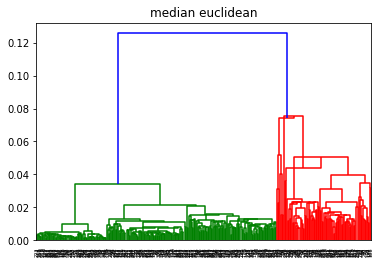

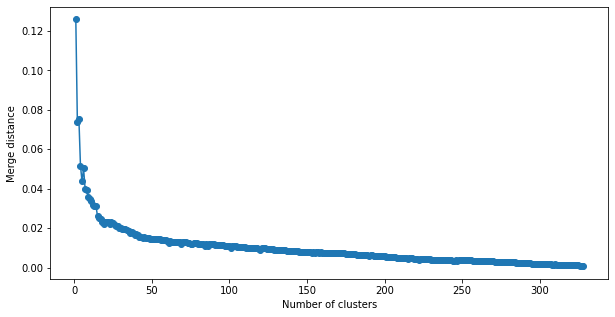

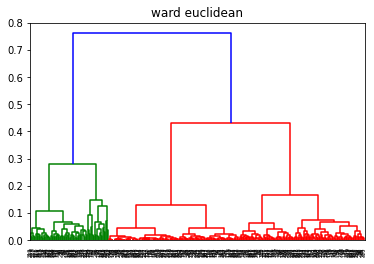

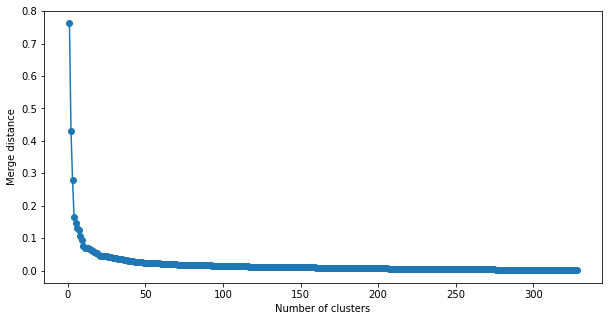

'\n\nВывод: наиболее оптимальная комбинация complete minkowski с перегибов в локтевом \nграфике в 0.4 \nВизуально на графике много ответвлений и они довольно плоские, из чего \nя сделала вывод что на основании определенных признаков делалась резкая кластеризация\n'

In [298]:
'''
не включать, очень долгая функция
'''
def ierarxy(method, metric):
  Z = linkage(data_nec, method=method, metric=metric)
  plt.title(method + " " + metric)
  dendrogram(Z)
  plt.show()
  return Z

def plot_elbow(Z, h=10, w=5):
    plt.figure(figsize=(h, w))
    plt.plot(np.array(range(1, np.shape(Z)[0]+1)), 
             Z[:,2][::-1], 
             marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Merge distance")
    plt.show()
methods = ['complete', 'average', 'weighted']
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 
           'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 
           'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 
           'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 
           'sqeuclidean']

for i in methods:
  for j in metrics:
   plot_elbow(ierarxy(i, j))

methods = [ 'centroid', 'median', 'ward']
for i in methods:
    plot_elbow(ierarxy(i, 'euclidean'))
'''
данный код перебираетвсе возможные комбинации методов и метрик и строит по ним график отображающий
разбиение и локтевой график отобращающий зависимость количества кластеров от растояний до ближайших 
соседей

изучив данные я пришла к выводу что количество кластеров должно быть в диапозоне от 4 до 6
то есть дешевые дома в трущебах, дома в спальнх районах (так же плохие, средние и хорошие), 
дома в дорогих районах (так же плохие, средние и хорошие)
выбирая метрики я смотрела на локтевые графики, чтобы до перегиба было не слишком много точек (хотя 
бы меньше 10)

некоторые коммбинации давали прямую линию вместо локтя, их я очевидно рассматривать не буду

такой результат мне давала только метрика cosine, которая рассмотривает данные как вектора
но мне важно чтобы дом с параметрами 0,0,0,... не был в одной категории с домом 1,1,1,...

тогда я понизила свои требования и решила брать параметр разбиения до самого локтя, но
локтевой график должен более крутой, чтобы разбиение присходило в начале, а не в самом конце 
при маленьки расстояниях

остановимся на методе complete так как он визуально раскидывает классы более адекватно чем остальные
и рассмотрим формулы метрик, помня, что дома нельзя рассматривать как вектора

метрика jensenshannon основана на вероятностных распределениях, выглядит не так симпатично как не которые 
другие, но зато не основана на векторах)
'''

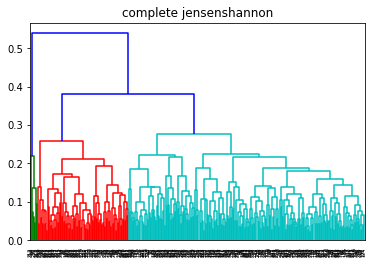

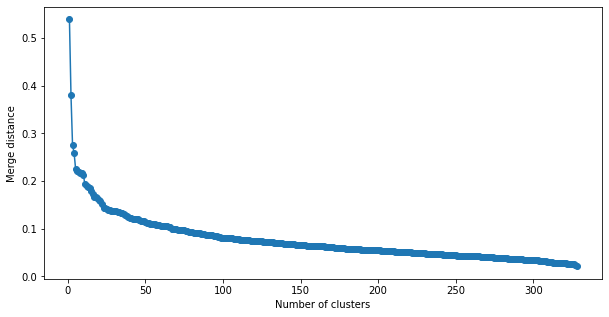

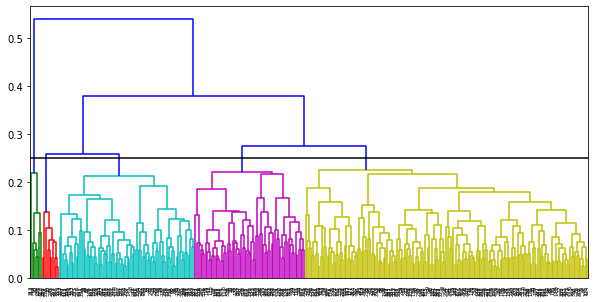

In [28]:
'''
выведем понравившеюся нам метрику еще раз и рассмотрим параметр перешиба равный
0.25 вычисленный по локтевому графику
у нас получается 5 классов, которые разные по размерам, но я думаю это входит в 
рамки нормы, мы же не знаем какой у нас дата сет. в полне возможно что элитных дома там 2
'''
def ierarxy(method, metric):
  Z = linkage(data_nec, method=method, metric=metric)
  plt.title(method + " " + metric)
  dendrogram(Z)
  plt.show()
  return Z

def plot_elbow(Z, h=10, w=5):
    plt.figure(figsize=(h, w))
    plt.plot(np.array(range(1, np.shape(Z)[0]+1)), 
             Z[:,2][::-1], 
             marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Merge distance")
    plt.show()
Z = ierarxy('complete', 'jensenshannon')
plot_elbow(Z)
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=0.25)
plt.axhline(y=0.25, c='k')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


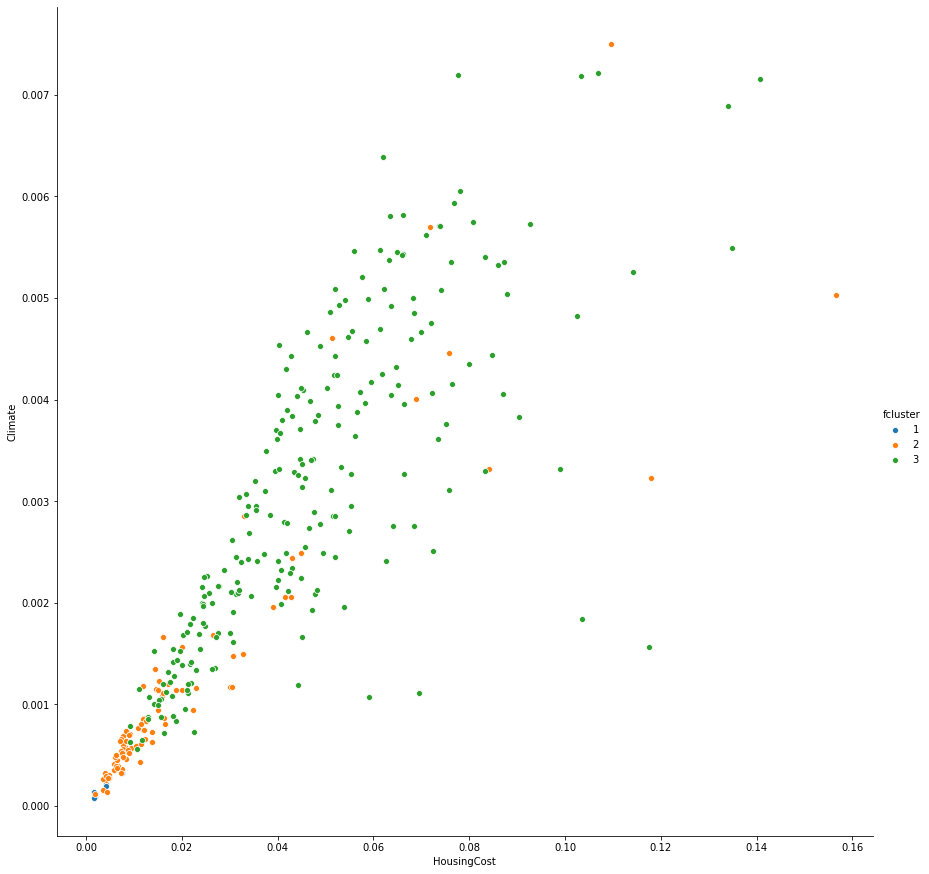

In [36]:
data_nec['fcluster'] = fcluster(Z, t=3, criterion='maxclust')

sns.pairplot(x_vars="HousingCost", 
             y_vars="Climate", 
             hue='fcluster',
             data=data_nec, 
             size=12)
plt.show()
data_nec.drop(['fcluster'], axis=1, inplace=True) # axis=0 will do for rows

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


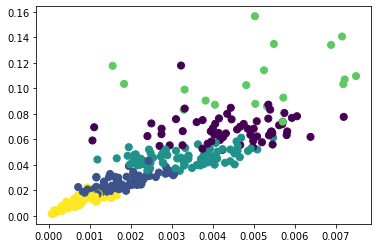

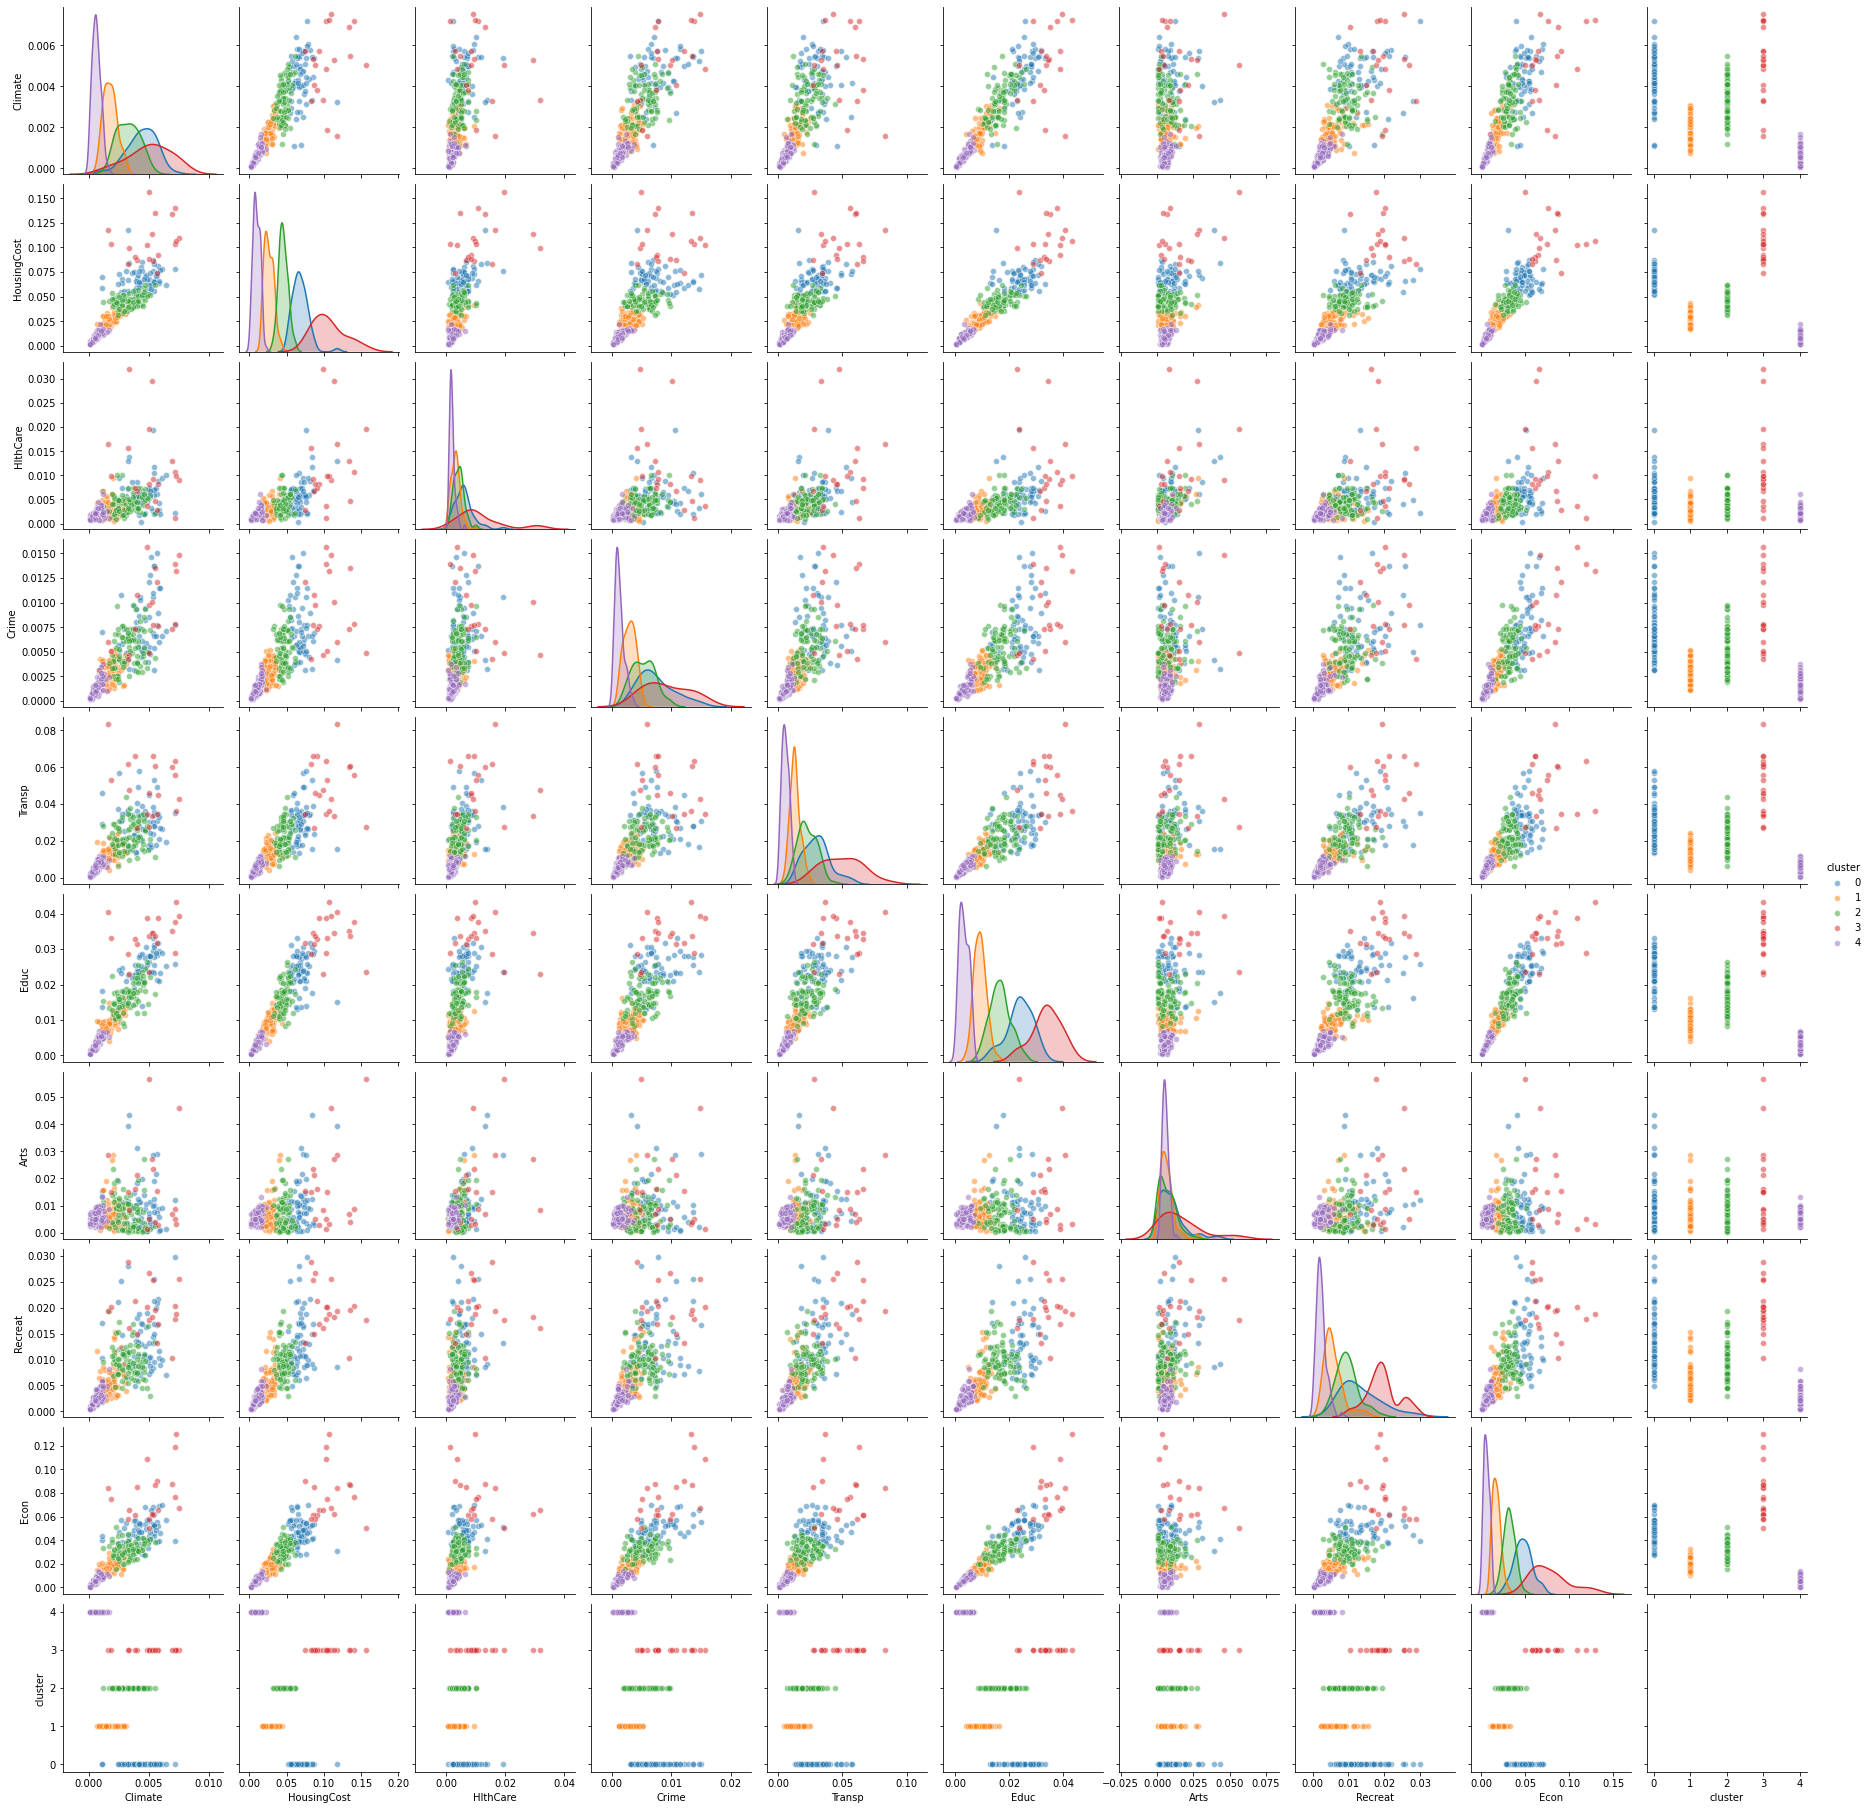

In [86]:
#task 4
Z = KMeans(n_clusters = 5, # число кластеров
           init = 'random',
           n_init = 1,
           max_iter = 100, 
           random_state=15434,
          )
Z.fit(data_nec)
data_kmeans = data_nec.copy() # shallow copy

data_kmeans['cluster'] = Z.labels_.astype(str)
plt.scatter(data_nec.to_numpy()[:, 0], data_nec.to_numpy()[:, 1], 
            c = [int(x) for x in data_kmeans['cluster'].to_numpy()], 
            s = 50, cmap = 'viridis')
sns.pairplot(data_kmeans.sort_values('cluster'), 
             hue='cluster', 
             plot_kws={'alpha':0.5}, 
             vars=data_kmeans.columns
            )
plt.show()



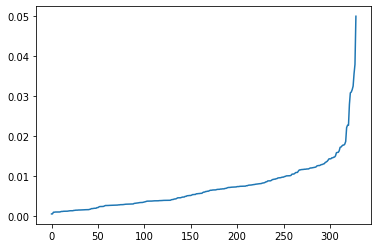

In [25]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_nec)
distances, indices = nbrs.kneighbors(data_nec)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

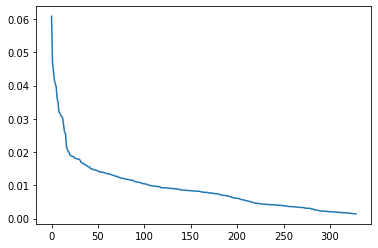

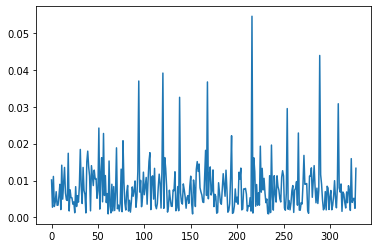

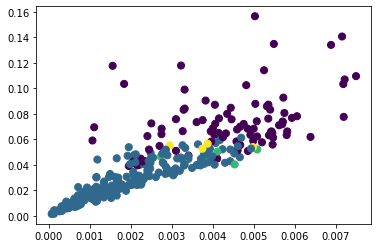

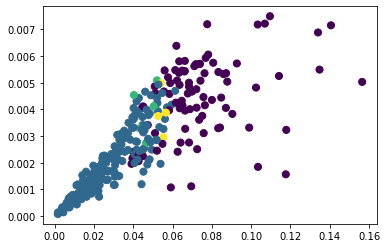

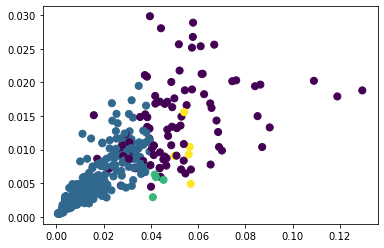

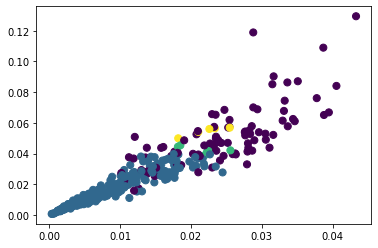

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


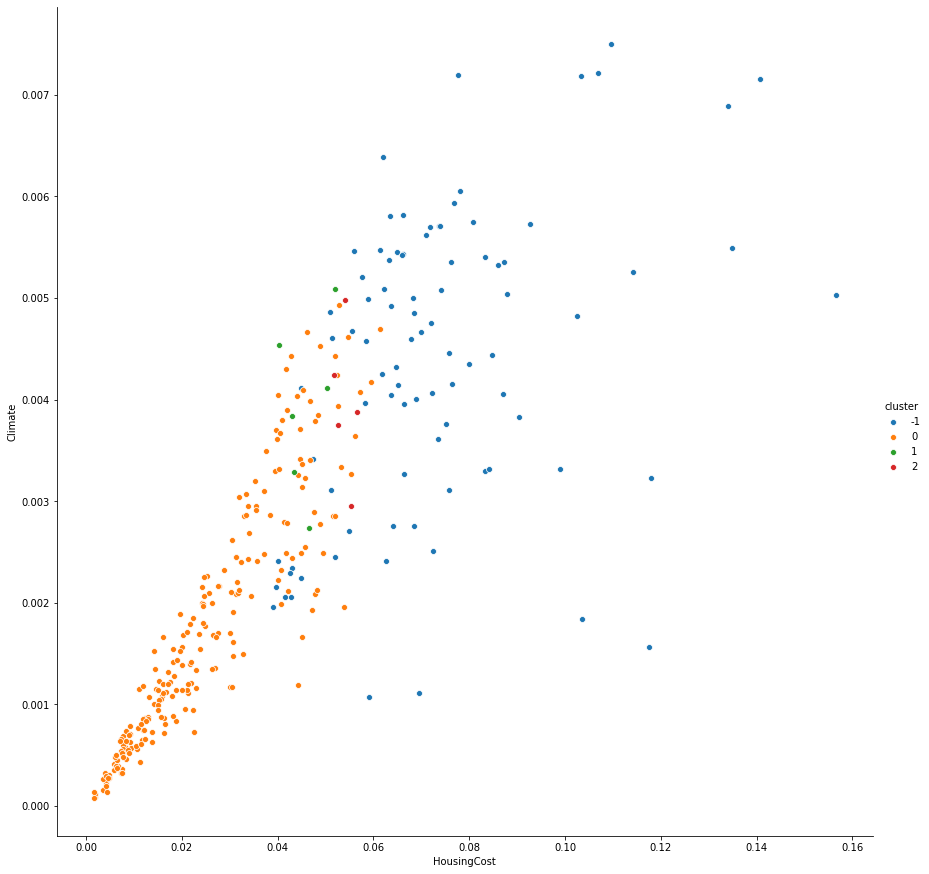

In [24]:
# 2 task
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
import scipy


dbscan = DBSCAN(eps=0.01, min_samples=k, metric='euclidean')
dbscan.fit_predict(data_nec)
#print(X_embedded)
#plt.scatter(data_nec.to_numpy()[:, 0], data_nec.to_numpy()[:, 1], c = X_embedded, s = 50, cmap = 'viridis')
#plt.figure(figsize=(12, 12))
data_db = data_nec.copy() # shallow copy

data_db['cluster'] = dbscan.labels_.astype(str)
plt.scatter(data_nec.to_numpy()[:, 0], data_nec.to_numpy()[:, 1], 
            c = [int(x) for x in data_db['cluster'].to_numpy()], 
            s = 50, cmap = 'viridis')
plt.show()
plt.scatter(data_nec['HousingCost'].values.tolist(), 
            data_nec['Climate'].values.tolist(), 
            c = [int(x) for x in data_db['cluster'].to_numpy()], 
            s = 50, cmap = 'viridis')
plt.show()
plt.scatter(data_nec['Econ'].values.tolist(), 
            data_nec['Recreat'].values.tolist(), 
            c = [int(x) for x in data_db['cluster'].to_numpy()], 
            s = 50, cmap = 'viridis')
plt.show()
plt.scatter(data_nec['Educ'].values.tolist(), 
            data_nec['Econ'].values.tolist(), 
            c = [int(x) for x in data_db['cluster'].to_numpy()], 
            s = 50, cmap = 'viridis')
plt.show()
sns.pairplot(x_vars="HousingCost", 
             y_vars="Climate", 
             hue='cluster',
             data=data_db, 
             size=12)
plt.show()       
plt.show()


In [26]:
#describing 
from sklearn import metrics

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


algorithms = []
algorithms.append(KMeans(n_clusters=5, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=5, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=5))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'Silhouette': metrics.silhouette_score(data_nec.to_numpy(), algo.labels_)}))

results = pd.DataFrame(data=data, columns=['Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

ValueError: ignored